In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

from moviepy.editor import VideoFileClip
from moviepy.editor import ipython_display

import numpy as np
import pandas as pd

from IPython.display import Audio

In [4]:
## Load and display the video
video_path = "data/video_data/498ynMnZ6Lo_30000/video.mp4"

video = VideoFileClip(video_path)

video.ipython_display(width=280, height=320)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [9]:
# Store the audio in a temporary 
audio = video.audio

audio.ipython_display()

MoviePy - Writing audio in __temp__.mp3


MoviePy - Done.


**MelSpectogram**

MoviePy - Writing audio in temp_audio.wav


MoviePy - Done.


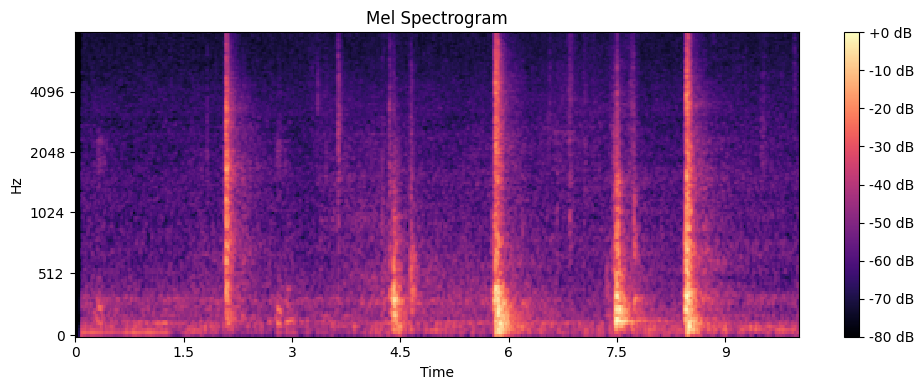

In [25]:
def display_melspectogram(y, sr):
    # Create the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

# Extract audio to a temporary WAV file (required for processing with librosa)
audio_file = 'temp_audio.wav'
audio.write_audiofile(audio_file, codec='pcm_s16le')
samples, sample_rate = librosa.load(audio_file)

display_melspectogram(samples, sample_rate)

In [33]:
## Saving (just) the melspectogram as an image
plt.imsave('mel_spectrogram_simple.png', S_DB, cmap='inferno', format='png')

**Waveform**

In [29]:
def display_waveform(y, sr, x_axis = 'time'):
    
    plt.figure(figsize=(14, 5))
    
    if x_axis == 'time':
        duration = len(y) / sr 
        time = np.linspace(0, duration, len(y))
        plt.plot(time, y)
        plt.xlabel('Time (Seconds)')
    else:
        plt.plot(y)
        plt.xlabel('Samples')

    plt.title('Waveform')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.2)
    plt.show()

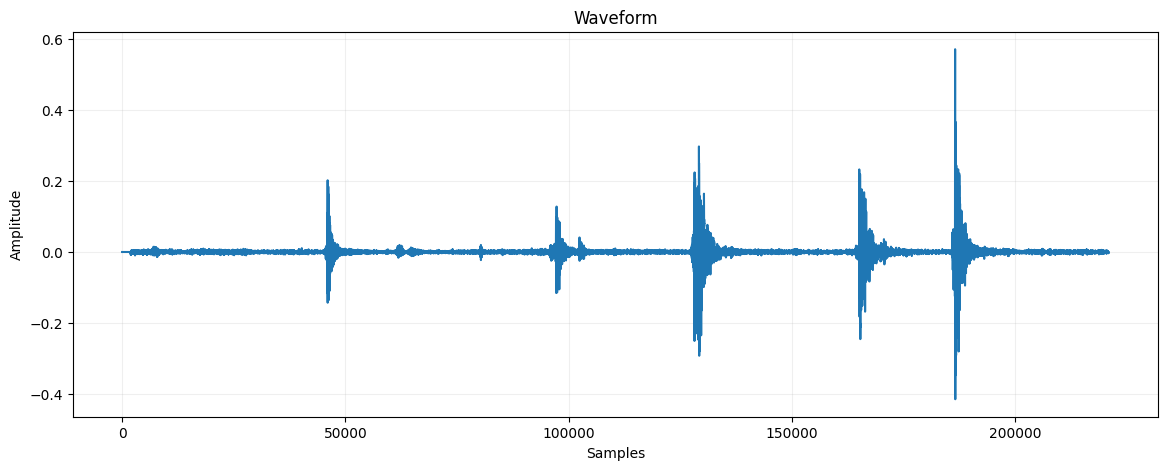

In [30]:
display_waveform(samples, sample_rate, x_axis='samples')

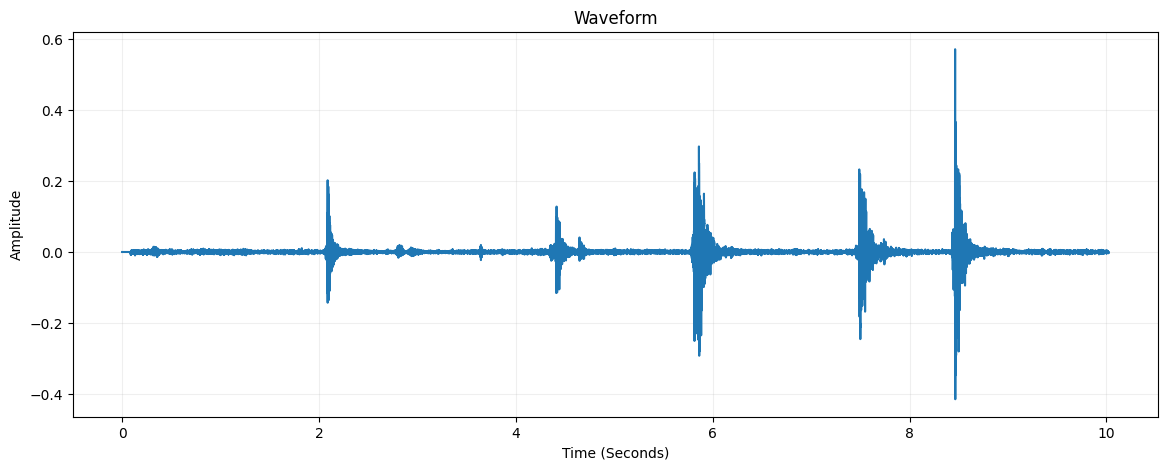

In [31]:
display_waveform(samples, sample_rate, x_axis='time')